<a href="https://colab.research.google.com/github/anadiedrichs/curso-aprendizaje-automatico/blob/main/neural_networks_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El perceptrón

El perceptrón es el bloque más básico de una red neuronal y se puede ver como un clasificador binario

  $$
  z = \sigma \left( \sum_{i=1}^{n} w_i x_i + b \right)
  $$

  donde $ \sigma $ es la función de activación y $ b $ es el sesgo (bias). Puedes mencionar que ajustando los pesos y el sesgo, el perceptrón aprende a hacer clasificaciones sencillas.

  Luego, el valor \(z\) pasa a través de una **función de activación**, que convierte ese valor en una salida final, que puede ser \(0\) o \(1\) (en el caso de clasificación binaria). La función de activación más simple es la **función escalón**:
$$
\text{output} =
\begin{cases}
1 & \text{si} \ z \geq 0 \\
0 & \text{si} \ z < 0
\end{cases}
$$

In [ ]:
import numpy as np

# Función de activación sigmoide

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptrón simple con dos entradas
def perceptron(x1, x2, w1, w2, bias):
      z = w1 * x1 + w2 * x2 + bias
      return sigmoid(z)

# Prueba del perceptrón con algunos pesos
output = perceptron(1, 0, 0.5, 0.5, 0.1)
print(f"Output del perceptrón: {output}")

Output del perceptrón: 0.6456563062257954


In [ ]:
# prompt: usando numpy crear una funcion que implemente un perceptrón simple

import numpy as np

def perceptron_np(inputs, weights, bias):
  """Implementa un perceptrón simple usando NumPy.

  Args:
    inputs: Una lista o array NumPy de entradas.
    weights: Una lista o array NumPy de pesos.
    bias: El sesgo (bias).

  Returns:
    La salida del perceptrón después de aplicar la función de activación sigmoide.
  """
  z = np.dot(inputs, weights) + bias
  return sigmoid(z)

# Ejemplo de uso:
inputs = np.array([1, 0])
weights = np.array([0.5, 0.5])
bias = 0.1

output = perceptron_np(inputs, weights, bias)
print(f"Output del perceptrón (NumPy): {output}")


Output del perceptrón (NumPy): 0.6456563062257954


## Funciones de activación

La función de activación introduce no linealidad en el modelo, lo cual es fundamental para que la red aprenda patrones complejos.


**ReLU**

$$\text{ReLU}(x) = \max(0, x)$$

La función ReLU es especialmente popular en redes profundas porque no satura como la sigmoide, lo que la hace más eficiente en términos de convergencia durante el entrenamiento.

**Sigmoide**:
    $$
    \sigma(x) = \frac{1}{1 + e^{-x}}
    $$


    



Graficamos varias funciones de activación

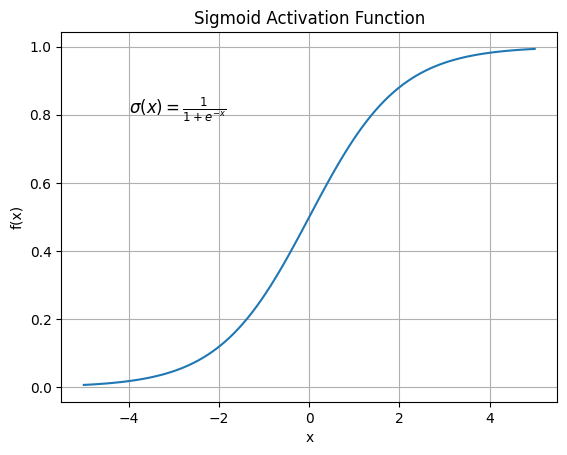

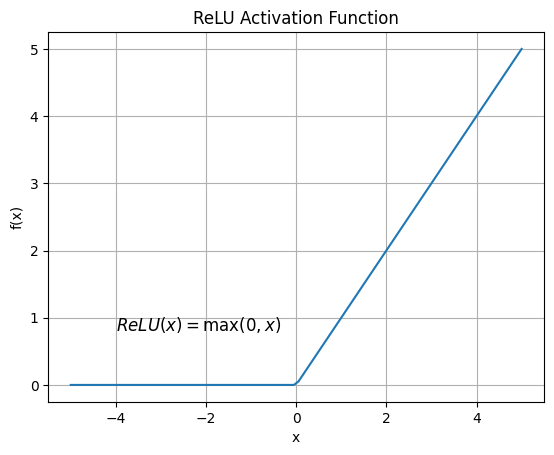

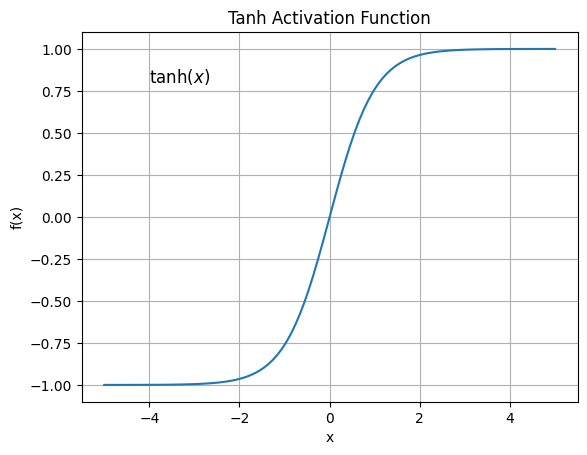

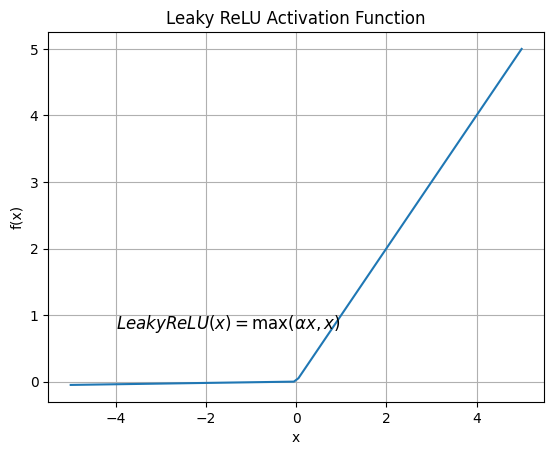

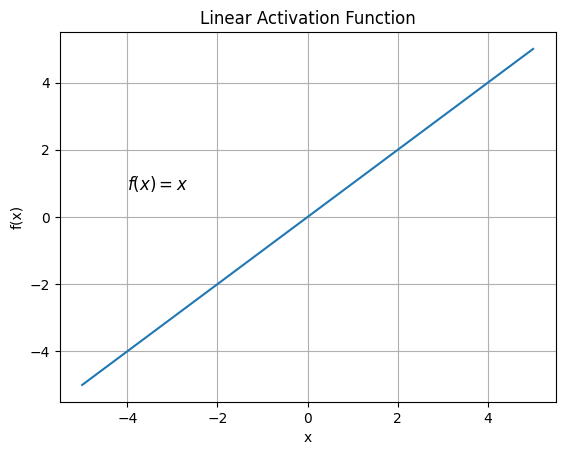

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

def linear(x):
    return x

# Generación de valores para graficar
x = np.linspace(-5, 5, 100)

# Lista de funciones de activación y sus nombres
activation_functions = [
    (sigmoid, "Sigmoid", r"$\sigma(x) = \frac{1}{1 + e^{-x}}$"),
    (relu, "ReLU", r"$ReLU(x) = \max(0, x)$"),
    (tanh, "Tanh", r"$\tanh(x)$"),
    (leaky_relu, "Leaky ReLU", r"$LeakyReLU(x) = \max(\alpha x, x)$"),
    (linear, "Linear", r"$f(x) = x$")
]


# Graficar cada función de activación en un gráfico separado
for func, name, formula in activation_functions:
    plt.figure()  # Crea una nueva figura para cada función
    plt.plot(x, func(x))
    plt.title(f"{name} Activation Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.text(-4, 0.8, formula, fontsize=12)  # agrego la fórmula al gráfico
    plt.show()


## Algoritmo de Aprendizaje
El objetivo del aprendizaje del perceptrón es encontrar los pesos óptimos para clasificar las entradas correctamente. El proceso de entrenamiento se lleva a cabo utilizando el siguiente algoritmo:

1. **Inicialización de los Pesos y Sesgo**:
   - Inicializar los pesos ($ w_i $) y el sesgo ($ b $) a valores pequeños (generalmente 0 o valores aleatorios pequeños).

2. **Repetir hasta convergencia**:
   Para cada muestra de entrenamiento $(x, t)$, donde $x$ es el vector de características y $t$ es la etiqueta esperada (1 o -1):
   
   1. **Calcular la salida**:
      - Calcular la salida del perceptrón utilizando la fórmula $ y = f\left(\sum_{i=1}^n w_i x_i + b\right) $.

   2. **Actualizar los pesos y el sesgo si la clasificación es incorrecta**:
      - Si $ y \neq t $, los pesos se actualizan con la regla de aprendizaje:
        $$
        w_i = w_i + \eta (t - y) x_i, \quad \forall i
        $$
        $$
        b = b + \eta (t - y)
        $$
      - Donde $ \eta $ es la tasa de aprendizaje, un hiperparámetro que controla el tamaño del ajuste.


### Ejemplo en Pseudocódigo
```pseudo
# Inicializar pesos y bias a cero o valores pequeños
w = [0, 0, ..., 0]
b = 0
eta = 0.01  # Tasa de aprendizaje

# Repetir el entrenamiento hasta convergencia o máximo de épocas
REPEAT
    error = 0
    PARA CADA muestra (x, t) en el conjunto de entrenamiento:
        y = signo(sum(w_i * x_i) + b)
        SI y != t ENTONCES
            PARA i DESDE 1 HASTA N:
                w_i = w_i + eta * (t - y) * x_i
            b = b + eta * (t - y)
            error = error + 1
    SI error == 0 ENTONCES
        TERMINAR
HASTA QUE CONVERJA
```


### Intuición del Algoritmo
- El perceptrón ajusta los pesos cada vez que comete un error en la clasificación de una muestra.
- La regla de actualización de los pesos incrementa o disminuye el valor del peso proporcionalmente a la entrada, y de acuerdo con la diferencia entre la predicción y la etiqueta real.
- Si los datos son linealmente separables, el algoritmo de perceptrón eventualmente encontrará un conjunto de pesos que clasifique correctamente todas las muestras.

### Limitaciones
- **Linealidad**: El perceptrón solo puede clasificar correctamente si los datos son linealmente separables. No puede resolver problemas como el **XOR**, que requieren una separación no lineal.
- **Convergencia**: Si los datos no son linealmente separables, el perceptrón no converge.


In [ ]:
import numpy as np

# Datos de entrenamiento (x) y etiquetas (y)
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
y = np.array([1, 1, -1, -1, 1])  # Etiquetas: -1 o 1

# Inicializar pesos y sesgo
w = np.zeros(X.shape[1])
b = 0
eta = 0.01  # Tasa de aprendizaje

# Entrenamiento
for epoch in range(100):
    error_count = 0
    for i in range(len(X)):
        y_pred = np.sign(np.dot(w, X[i]) + b)
        if y_pred != y[i]:
            w += eta * (y[i] - y_pred) * X[i]
            b += eta * (y[i] - y_pred)
            error_count += 1
    if error_count == 0:
        print(f'Convergió después de {epoch} épocas')
        break

In [ ]:
w

array([0.07, 0.07])

In [ ]:
b

-0.15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de activación escalón
# Esta función devuelve 1 si la entrada es mayor que 0, de lo contrario devuelve 0
def step_function(x):
    return np.where(x >= 0, 1, 0)


In [ ]:

# El perceptrón tiene pesos iniciales, un sesgo y una función de activación
def perceptron(X, y, learning_rate=0.1, epochs=10):
    # Inicializar pesos y sesgo
    weights = np.zeros(X.shape[1])
    bias = 0

    # Entrenamiento
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Calcular la salida
            linear_output = np.dot(X[i], weights) + bias
            y_pred = step_function(linear_output)

            # Actualizar pesos y sesgo si la predicción es incorrecta
            # cálculo del error
            error = y[i] - y_pred
            # actualizar los pesos
            weights += learning_rate * error * X[i]
            # actualizar el sesgo
            bias += learning_rate * error

    return weights, bias

# Datos de ejemplo para entrenar un perceptrón
# Problema AND lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Entrenar el perceptrón
weights, bias = perceptron(X, y)

# Mostrar los resultados
print(f'Pesos entrenados: {weights}')
print(f'Sesgo entrenado: {bias}')

# Probar el perceptrón con los datos de entrada
for i in range(X.shape[0]):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f'Entrada: {X[i]}, Salida predicha: {y_pred}')

Pesos entrenados: [0.2 0.1]
Sesgo entrenado: -0.20000000000000004
Entrada: [0 0], Salida predicha: 0
Entrada: [0 1], Salida predicha: 0
Entrada: [1 0], Salida predicha: 0
Entrada: [1 1], Salida predicha: 1


In [ ]:
# Datos de ejemplo para entrenar un perceptrón
# Problema XOR lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Entrenar el perceptrón
weights, bias = perceptron(X, y)

# Mostrar los resultados
print(f'Pesos entrenados: {weights}')
print(f'Sesgo entrenado: {bias}')

# Probar el perceptrón con los datos de entrada
for i in range(X.shape[0]):
    linear_output = np.dot(X[i], weights) + bias
    y_pred = step_function(linear_output)
    print(f'Entrada: {X[i]}, Salida predicha: {y_pred}')

Pesos entrenados: [-0.1  0. ]
Sesgo entrenado: 0.0
Entrada: [0 0], Salida predicha: 1
Entrada: [0 1], Salida predicha: 1
Entrada: [1 0], Salida predicha: 0
Entrada: [1 1], Salida predicha: 0


## Perceptrón en sklearn

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron

# Datos de ejemplo para entrenar un perceptrón
# Problema AND lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Definir el modelo de perceptrón usando sklearn
model = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Entrenar el modelo
model.fit(X, y)

# Mostrar los pesos y el sesgo entrenados
print(f'Pesos entrenados: {model.coef_}')
print(f'Sesgo entrenado: {model.intercept_}')

# Probar el perceptrón con los datos de entrada
y_pred = model.predict(X)
for i in range(X.shape[0]):
    print(f'Entrada: {X[i]}, Salida predicha: {y_pred[i]}')

Pesos entrenados: [[0.2 0.1]]
Sesgo entrenado: [-0.2]
Entrada: [0 0], Salida predicha: 0
Entrada: [0 1], Salida predicha: 0
Entrada: [1 0], Salida predicha: 0
Entrada: [1 1], Salida predicha: 1


## Perceptrón en tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Datos de ejemplo para entrenar un perceptrón
# Problema AND lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Definir el modelo de perceptrón usando TensorFlow
model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')  # Capa densa con 1 neurona y activación sigmoide
])

# Compilar el modelo
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X, y, epochs=100, verbose=0)

# Mostrar los pesos y el sesgo entrenados
weights, bias = model.layers[0].get_weights()
print(f'Pesos entrenados: {weights.flatten()}')
print(f'Sesgo entrenado: {bias}')

# Probar el perceptrón con los datos de entrada
y_pred = model.predict(X)
for i in range(X.shape[0]):
    print(f'Entrada: {X[i]}, Salida predicha: {np.round(y_pred[i][0])}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pesos entrenados: [0.4211072  0.48415482]
Sesgo entrenado: [-0.32531327]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Entrada: [0 0], Salida predicha: 0.0
Entrada: [0 1], Salida predicha: 1.0
Entrada: [1 0], Salida predicha: 1.0
Entrada: [1 1], Salida predicha: 1.0


## Perceptrón en pytorch

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Datos de ejemplo para entrenar un perceptrón
# Problema AND lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

# Convertir los datos a tensores de PyTorch
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Definir el modelo de perceptrón usando PyTorch
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Capa lineal con 2 entradas y 1 salida
        self.activation = nn.Sigmoid()  # Función de activación sigmoide

    def forward(self, x):
        x = self.fc(x) # fully convolutional
        x = self.activation(x)
        return x

# Instanciar el modelo
model = Perceptron()

# Definir el optimizador y la función de pérdida
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Entrenar el modelo
epochs = 100
for epoch in range(epochs):
    # Paso hacia adelante
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Paso hacia atrás y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Mostrar los pesos y el sesgo entrenados
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.numpy()}')

# Probar el perceptrón con los datos de entrada
y_pred = model(X_tensor).detach().numpy()
for i in range(X.shape[0]):
    print(f'Entrada: {X[i]}, Salida predicha: {np.round(y_pred[i][0])}')

fc.weight: [[0.38070992 0.30883798]]
fc.bias: [-1.0775615]
Entrada: [0. 0.], Salida predicha: 0.0
Entrada: [0. 1.], Salida predicha: 0.0
Entrada: [1. 0.], Salida predicha: 0.0
Entrada: [1. 1.], Salida predicha: 0.0


## Perceptrón multicapa

### Pseudocódigo del Algoritmo de Entrenamiento

```pseudocodigo

# Inicializar pesos y bias aleatoriamente
inicializar_pesos_y_sesgos()

# Repetir hasta la convergencia
REPEAT
    PARA CADA muestra de entrenamiento (x, t):
        # Propagación hacia adelante
        PARA CADA capa oculta Y capa de salida:
            calcular_activación()

        # Calcular error en la capa de salida
        calcular_error(t, y)

        # Retropropagación del error
        PARA CADA capa desde la salida hasta la entrada:
            calcular_gradiente()
            actualizar_pesos()

HASTA CONVERGENCIA
```


1. **Inicialización de Pesos**:
   - Los pesos y sesgos se inicializan a valores aleatorios pequeños.

2. **Propagación Hacia Adelante (Forward Propagation)**:
   - Las entradas son pasadas a través de la red, capa por capa, aplicando los pesos y las funciones de activación.
   - El resultado final es la salida de la red.

3. **Cálculo del Error**:
   - Para cada muestra de entrenamiento, se calcula el error comparando la salida de la red con el valor esperado (etiqueta real).
   - **Función de pérdida**: Se utiliza una función de pérdida para cuantificar el error. La más común es el **error cuadrático medio (MSE)** para regresión o la **entropía cruzada** para clasificación.

4. **Retropropagación del Error**:
   - El error calculado en la capa de salida se propaga hacia atrás a través de la red.
   - Se calcula el **gradiente del error** respecto a los pesos de cada capa utilizando la **regla de la cadena**.
   - Los pesos se ajustan en dirección opuesta al gradiente del error, para reducirlo.

5. **Actualización de los Pesos (Descenso de Gradiente)**:
   - Los pesos se ajustan utilizando la fórmula:
   $$
   w_{ij} = w_{ij} - \eta \frac{\partial L}{\partial w_{ij}}
   $$
   Donde:
   - $$ \eta $$ es la **tasa de aprendizaje** (controla el tamaño del paso de ajuste).
   - $$ L $$ es la **función de pérdida**.
   - $$ w_{ij} $$ es el peso que conecta la neurona $$i$$ con la neurona $$j$$.


In [ ]:
import numpy as np

# Datos de ejemplo para entrenar un perceptrón multicapa
# Problema de clasificación XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Definir la arquitectura del perceptrón multicapa
input_size = 2
hidden_size = 2
output_size = 1

# Inicializar los pesos y sesgos
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_hidden = np.random.randn(hidden_size)
bias_output = np.random.randn(output_size)

# Definir la función de activación sigmoide y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Definir el algoritmo de entrenamiento
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    # Paso hacia adelante o feed forward
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calcular el error
    error = y - final_output

    # Paso hacia atrás (propagación del error)
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Actualizar los pesos y sesgos
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0) * learning_rate

# Probar el perceptrón multicapa con los datos de entrada
hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)
final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_input)

for i in range(X.shape[0]):
    print(f'Entrada: {X[i]}, Salida predicha: {np.round(final_output[i][0])}')

Entrada: [0 0], Salida predicha: 0.0
Entrada: [0 1], Salida predicha: 0.0
Entrada: [1 0], Salida predicha: 1.0
Entrada: [1 1], Salida predicha: 1.0


In [ ]:
from sklearn.neural_network import MLPClassifier

# Crear el dataset de ejemplo
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]  # Etiquetas para resolver el problema XOR

# Crear y entrenar el perceptrón multicapa
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, activation='relu', solver='sgd', learning_rate_init=0.01)
mlp.fit(X, y)

# Hacer predicciones
predicciones = mlp.predict(X)
print("Predicciones:", predicciones)


Predicciones: [0 1 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP regresión + overfitting

Sobreajuste en redes neuronales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generamos un conjunto de datos sintético para regresión
X, y = make_regression(n_samples=500, n_features=4, noise=15, random_state=42)

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

array([[-0.92323325, -1.4066611 , -0.6115178 , -1.35168461],
       [-1.34445051, -0.28178461, -0.42018682, -0.91865195],
       [-2.0674421 , -0.03269475,  0.38406545, -0.08912004],
       ...,
       [-0.74247059,  0.19460746, -0.62264936, -1.32002251],
       [ 0.39445214, -0.43255819, -0.48760622, -0.42098448],
       [ 0.38019785, -1.33534436,  0.177701  ,  0.61058575]])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(5,), alpha=0.001
  - Error de entrenamiento: 810.3661
  - Error de prueba: 1030.4068



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(10,), alpha=0.001
  - Error de entrenamiento: 250.7156
  - Error de prueba: 307.0035



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(25,), alpha=0.001
  - Error de entrenamiento: 225.3377
  - Error de prueba: 265.2120



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(50,), alpha=0.001
  - Error de entrenamiento: 209.7269
  - Error de prueba: 251.5813



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(100,), alpha=0.001
  - Error de entrenamiento: 203.2526
  - Error de prueba: 245.1025



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(200,), alpha=0.001
  - Error de entrenamiento: 193.0812
  - Error de prueba: 233.9842



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(300,), alpha=0.001
  - Error de entrenamiento: 188.2032
  - Error de prueba: 233.5429



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hiperparámetros: hidden_layers=(3000,), alpha=0.001
  - Error de entrenamiento: 161.6518
  - Error de prueba: 242.0969



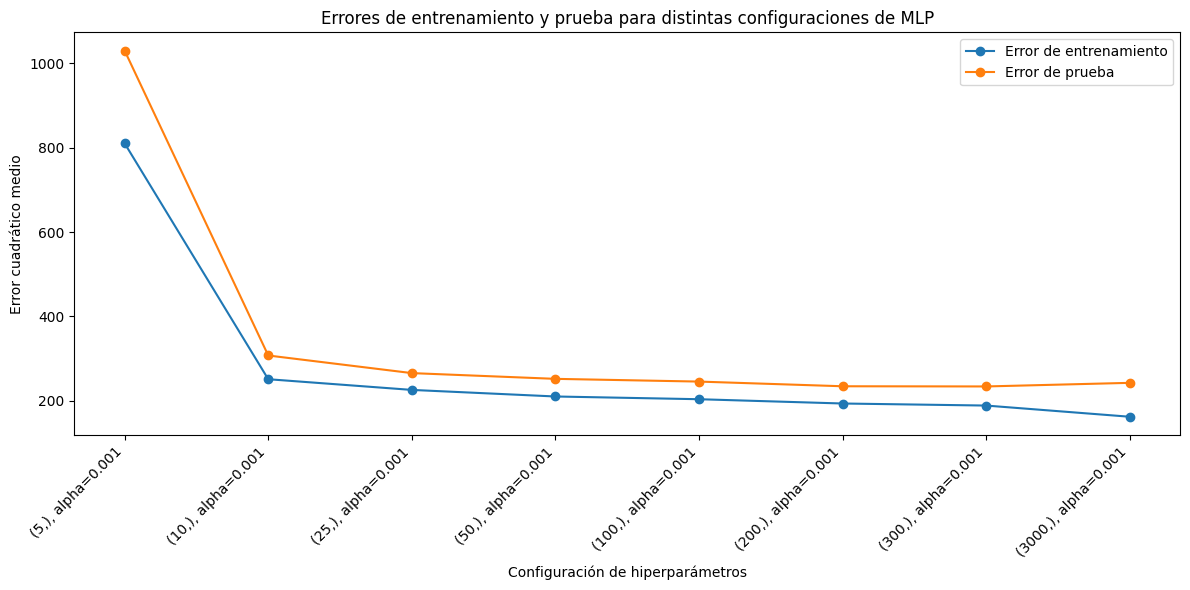

In [ ]:

# Definimos una función para entrenar y evaluar el MLP

def train_and_evaluate(hidden_layer_sizes, max_iter=1000, alpha=0.0001):
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    return train_error, test_error, mlp

# Definimos hiperparámetros para analizar el comportamiento del modelo y el sobreajuste
hidden_layers_list = [(5,),(10,),(25,), (50,), (100,), (200,),(300,),(3000,)]
alpha_value = 0.001

# Guardamos los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Entrenamos los modelos con distintos hiperparámetros
for hidden_layers in hidden_layers_list:
    train_error, test_error, mlp_model = train_and_evaluate(hidden_layers, alpha=alpha_value)
    train_errors.append((hidden_layers, alpha_value, train_error))
    test_errors.append((hidden_layers, alpha_value, test_error))
    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: {train_error:.4f}")
    print(f"  - Error de prueba: {test_error:.4f}\n")

# Graficamos los errores de entrenamiento y prueba
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _ in train_errors]
train_error_values = [error for _, _, error in train_errors]
test_error_values = [error for _, _, error in test_errors]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o')
plt.plot(x, test_error_values, label='Error de prueba', marker='o')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error cuadrático medio')
plt.title('Errores de entrenamiento y prueba para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()



## misma implementación pero en Pytorch

Hiperparámetros: hidden_layers=(5,), alpha=0.001
  - Error de entrenamiento: 1670.3654
  - Error de prueba: 2093.5862

Hiperparámetros: hidden_layers=(50,), alpha=0.001
  - Error de entrenamiento: 229.3951
  - Error de prueba: 271.3763

Hiperparámetros: hidden_layers=(100,), alpha=0.001
  - Error de entrenamiento: 209.8190
  - Error de prueba: 248.1076

Hiperparámetros: hidden_layers=(200,), alpha=0.001
  - Error de entrenamiento: 196.5240
  - Error de prueba: 233.3512



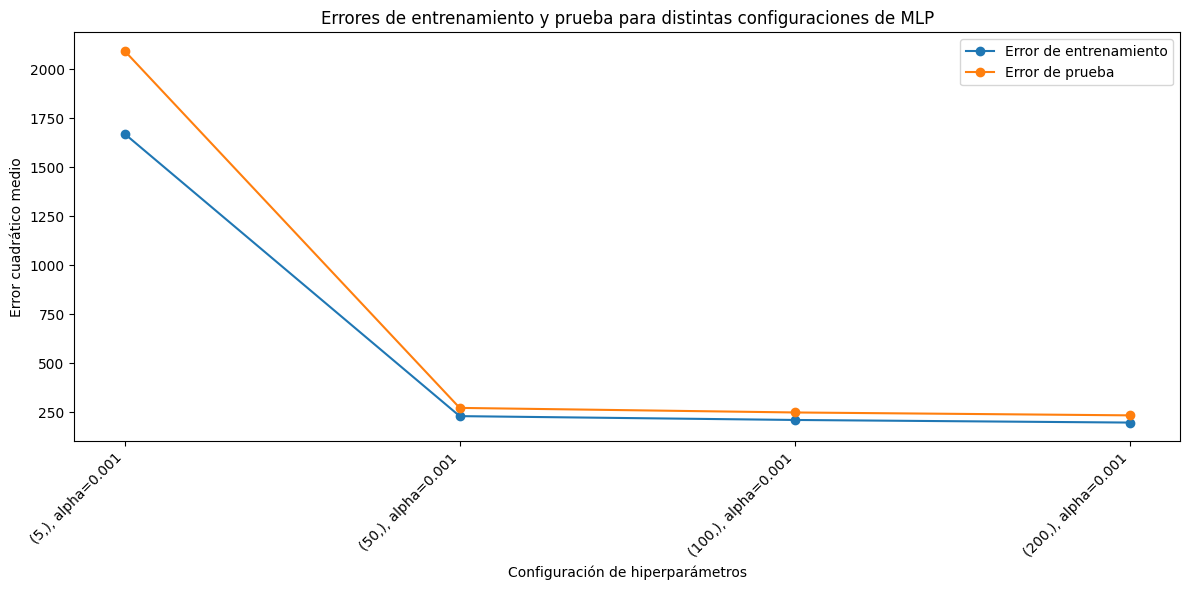

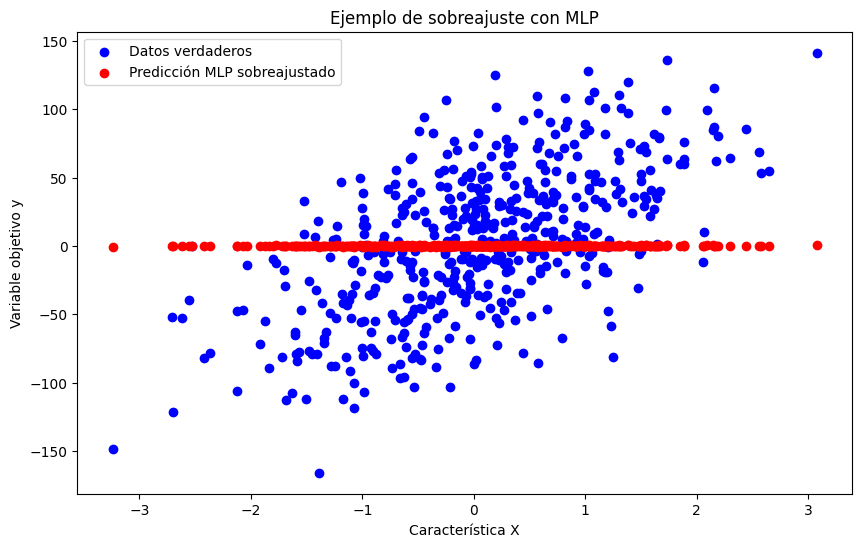

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim

# Generamos un conjunto de datos sintético para regresión
X, y = make_regression(n_samples=500, n_features=4, noise=15, random_state=42)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().view(-1, 1)

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos la clase para el MLP
class MLPRegressorTorch(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPRegressorTorch, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Definimos una función para entrenar y evaluar el MLP

def train_and_evaluate(hidden_layer_sizes, lr=0.001, epochs=1000):
    model = MLPRegressorTorch(input_size=X.shape[1], hidden_layer_sizes=hidden_layer_sizes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Entrenamiento
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred_train = model(X_train)
        loss = criterion(y_pred_train, y_train)
        loss.backward()
        optimizer.step()

    # Evaluación
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train)
        y_test_pred = model(X_test)
        train_error = mean_squared_error(y_train.numpy(), y_train_pred.numpy())
        test_error = mean_squared_error(y_test.numpy(), y_test_pred.numpy())

    return train_error, test_error, model

# Definimos hiperparámetros para analizar el comportamiento del modelo y el sobreajuste
hidden_layers_list = [(5,), (50,), (100,), (200,)]
alpha_value = 0.001

# Guardamos los errores de entrenamiento y prueba
train_errors = []
test_errors = []

# Entrenamos los modelos con distintos hiperparámetros
for hidden_layers in hidden_layers_list:
    train_error, test_error, mlp_model = train_and_evaluate(hidden_layers, lr=alpha_value)
    train_errors.append((hidden_layers, alpha_value, train_error))
    test_errors.append((hidden_layers, alpha_value, test_error))
    print(f"Hiperparámetros: hidden_layers={hidden_layers}, alpha={alpha_value}")
    print(f"  - Error de entrenamiento: {train_error:.4f}")
    print(f"  - Error de prueba: {test_error:.4f}\n")

# Graficamos los errores de entrenamiento y prueba
hidden_layer_labels = [f"{hl}, alpha={alpha_value}" for hl, _, _ in train_errors]
train_error_values = [error for _, _, error in train_errors]
test_error_values = [error for _, _, error in test_errors]

plt.figure(figsize=(12, 6))
x = np.arange(len(hidden_layer_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o')
plt.plot(x, test_error_values, label='Error de prueba', marker='o')
plt.xticks(x, hidden_layer_labels, rotation=45, ha='right')
plt.xlabel('Configuración de hiperparámetros')
plt.ylabel('Error cuadrático medio')
plt.title('Errores de entrenamiento y prueba para distintas configuraciones de MLP')
plt.legend()
plt.tight_layout()
plt.show()

# Visualizamos sobreajuste (construimos un modelo que está claramente sobreajustado)
train_error, test_error, mlp_overfit = train_and_evaluate(hidden_layer_sizes=(200,), lr=0.00001)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Datos verdaderos')
plt.scatter(X[:, 0], mlp_overfit(X).detach().numpy(), color='red', label='Predicción MLP sobreajustado')
plt.xlabel('Característica X')
plt.ylabel('Variable objetivo y')
plt.title('Ejemplo de sobreajuste con MLP')
plt.legend()
plt.show()

## Regularización en redes neuronales

Ver ejemplo en https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

# Recursos

Entrenamiento con backpropagation

https://www.jeremyjordan.me/neural-networks-training/

Paso a paso calculando backpropagation

https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/


